# 3.3 Visualizing data

## Motivation

`pandas`' API provides integration with the plotting functionalities provided by the `matplotlib` library.

This seamless integration – which is very nice! – hides away from users some of the complexities of `matplotlib`.

However, as there cases where advanced customizations are needed, it's useful to learn the high-level plotting functionalities of `pandas` or `seaborn` as well as being aware of how to perform more advanced customizations by means of `matplotlib`.

## Digging into `matplotlib`

Very useful [`matplotlib` cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

In [65]:
import numpy as np
import matplotlib.pyplot as plt

### Anatomy of a plot

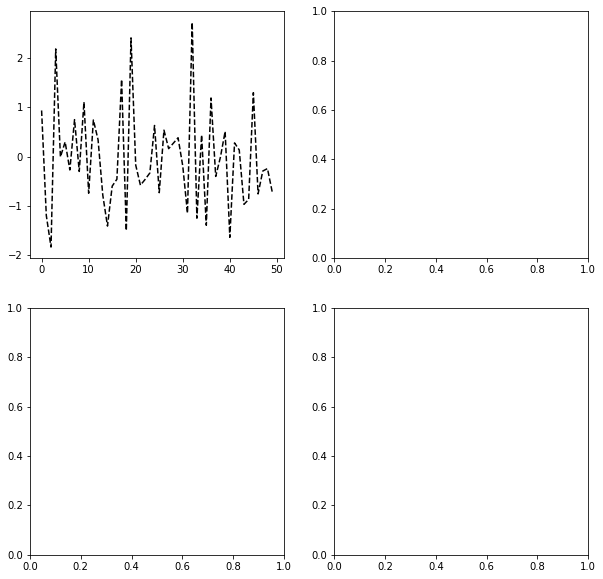

In [66]:
%matplotlib inline

# first we create the figure, which is the 
# container where all plots reside
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#plt.show()

Each plot resides within a `Figure` object.

In [67]:
type(fig)

matplotlib.figure.Figure

Each subsplot resides within an `AxesSubplot` object.

In [10]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

In [9]:
# plt.subplots?

In [71]:
axes[0,0]

<AxesSubplot:>

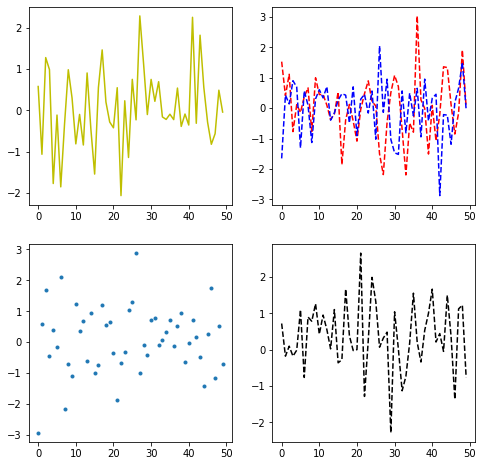

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot(np.random.randn(50), 'y-')
axes[0,1].plot(np.random.randn(50), 'r--')
axes[0,1].plot(np.random.randn(50), 'b--')
axes[1,1].plot(np.random.randn(50), 'k--')
axes[1,0].plot(np.random.randn(50), '.')

fig.set_size_inches(8, 8)

## Let's plot

- number of contracts by corporation
- distribution of length of contract, colored by corporation
- plot of annual salary against length of contract, colored by genre
- plot of annual salary against age at entry, colored by genre/gilda
- annual salary by corporation

In [78]:
import os
import codecs
import pandas as pd

In [79]:
data_folder = "../data/apprenticeship_venice/"
df_contracts = pd.read_csv(
    codecs.open(os.path.join(data_folder,"professions_data.csv"),
                encoding="utf8"),
    sep=";"
)

In [80]:
df_contracts.head(2)

,page_title,register,annual_salary,a_profession,profession_code_strict,profession_code_gen,profession_cat,corporation,keep_profession_a,complete_profession_a,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
0,Carlo Della sosta (Orese) 1592-08-03,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,orese,orese,orefice,orefice,Oresi,1,1,...,1,1,1,0,0,0,0,0,NaN,0
1,Antonio quondam Andrea (squerariol) 1583-01-09,"asv, giustizia vecchia, accordi dei garzoni, 1...",12.5,squerariol,squerariol,lavori allo squero,lavori allo squero,Squerarioli,1,1,...,0,0,1,0,0,0,1,0,1.0,0


In [81]:
df_contracts.corporation.unique()

array(['Oresi', 'Squerarioli', 'Battioro', 'Merzeri', 'Marangoni',
       'Università dei Stampadori e Libreri', 'Specchieri', 'Tentori',
       'Coroneri', 'Fabbri', 'Tiraoro', 'Da Colori', 'Cuoridoro',
       'perleri', 'Tornidori', 'Pittori', 'Tagliapietra', 'Mureri',
       'Libreri da carta bianca e da conti', 'Intagliatori',
       'Merzeri . Stringheri . Teleroli', 'Merzeri . Stringheri', nan,
       'Desegnadori', 'Carteri', 'Gioielleri', 'Latoneri',
       'Musici e suonatori', 'Merzeri . Coroneri . Margariteri',
       'Margariteri', 'Diamanteri', 'Tagliapietra . ', 'Sabioneri',
       'Verieri', 'Cuoridoro . Merzeri', 'Indoratori', ' . ',
       'Verieri da smalti', 'Varoteri', 'Merzeri . Teleroli',
       'Teleroli . Merzeri . Bombasseri .  . Fustagneri',
       'Merzeri . Teleroli .  . Fustagneri . Bombasseri', 'Specieri',
       'Cereri', ' . Musici e suonatori', 'Oresi . Gioielleri',
       'Strazzaroli . Merzeri', 'Merzeri . Carteri',
       'Università dei Stampadori e

In [19]:
df_contracts.shape

(9653, 47)

In [82]:
filter_corporation = [
    "Oresi",
    "Specieri",
    "Marangoni",
    "Università dei Stampadori e Libreri"
]

In [83]:
contracts_zoom_df = df_contracts[df_contracts.corporation.isin(filter_corporation)]

In [84]:
contracts_zoom_df.shape

(1945, 47)

### Plot: number of contracts by corporation

In [48]:
contracts_zoom_df[['page_title']]

,page_title
0,Carlo Della sosta (Orese) 1592-08-03
5,Andrea Manfredo (marangon) 1664-02-04
6,Marcho de Zuane (all'arte della stampa) 1621-1...
11,Andrea Zangiardo (librer) 1645-07-28
22,Carletto Barbarigo (orefice) 1621-08-31
...,...
9611,Zamaria de Gasparo (stampador) 1645-11-28
9612,Girardo de Zuan Piero (marangon) 1593-04-07
9631,Gierolimo Marchi (speciale da confesion) 1622-...
9637,Piero Torella (librer) 1645-01-02


In [50]:
pd.pivot_table(
    contracts_zoom_df,
    index='corporation',
    aggfunc={'female_guarantor': 'sum'}
)

,female_guarantor
corporation,
Marangoni,20
Oresi,42
Specieri,4
Università dei Stampadori e Libreri,13


In [85]:
corporation_size = pd.pivot_table(
    contracts_zoom_df,
    index='corporation',
    aggfunc={'page_title': 'count'}
)

In [ ]:
corporation_size

,page_title
corporation,
Marangoni,748
Oresi,640
Specieri,158
Università dei Stampadori e Libreri,399


In [44]:
# let's reshape the data
# to make plotting easier

corporation_size = pd.pivot_table(
    contracts_zoom_df,
    index='corporation',
    aggfunc={'page_title': 'count'}
).rename(columns={'page_title':'size'})

In [45]:
corporation_size

,size
corporation,
Marangoni,748
Oresi,640
Specieri,158
Università dei Stampadori e Libreri,399


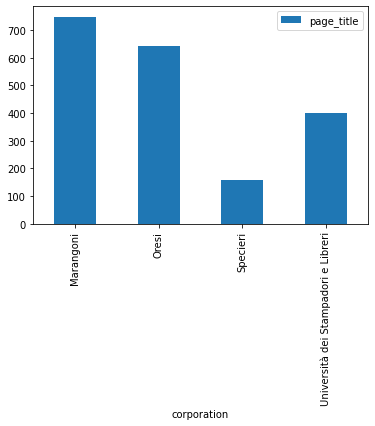

In [87]:
# first try

ax = corporation_size.plot.bar()

#### Legend

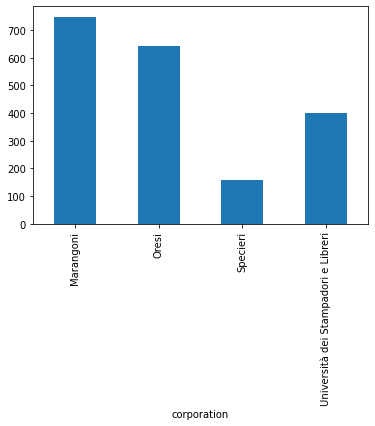

In [88]:
# second try
# remove the legend as it does not make much sense in this case

ax = corporation_size.plot.bar(legend=False)

#### Label the axes

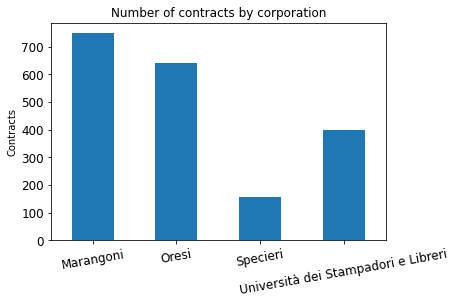

In [90]:
# third try
# we rotate the tick labels on the x axis

ax = corporation_size.plot.bar(
    legend=False,
    rot=10, # rotate tick labels on x axis
    figsize=(6, 4),
    fontsize="large" # try changing to 9, 14, 26
)

# set a readable title for the plot
ax.set_title('Number of contracts by corporation')

# label the y axis
ax.set_ylabel('Contracts')

# remove the x axis as it clutters the plot
xlabel = ax.set_xlabel('')

#### Save

To save our plot, we need to get the `Figure` element that contains it:

In [91]:
fig = ax.get_figure()
type(fig)

matplotlib.figure.Figure

In [92]:
fig.savefig('figures/plot1.png')

In [93]:
# if you are publishing an article, they will
# ask you images with min 300 dpi

fig.savefig('figures/plot1_300dpi.png', dpi=300)

**Exercise**: rename the "Università dei Stampadori e Libreri" to "Stampadori e Libreri" before plotting the data.

(**Hint**: the renaming is easier if before pivoting the data you cast `corporation` to categorical data)

### Plot: annual salary vs length of contract

In [54]:
contracts_zoom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 9639
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   page_title                1945 non-null   object 
 1   register                  1945 non-null   object 
 2   annual_salary             1633 non-null   float64
 3   a_profession              1945 non-null   object 
 4   profession_code_strict    1945 non-null   object 
 5   profession_code_gen       1945 non-null   object 
 6   profession_cat            1945 non-null   object 
 7   corporation               1945 non-null   object 
 8   keep_profession_a         1945 non-null   int64  
 9   complete_profession_a     1945 non-null   int64  
 10  enrolmentY                1941 non-null   float64
 11  enrolmentM                1942 non-null   float64
 12  startY                    1924 non-null   float64
 13  startM                    1927 non-null   float64
 14  length  

<AxesSubplot:xlabel='annual_salary', ylabel='length'>

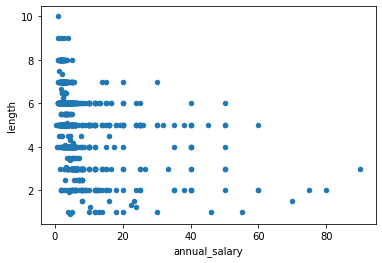

In [55]:
contracts_zoom_df.plot.scatter(x='annual_salary', y='length')

#### Meet `seaborn`

`seaborn` is a library built on top of `matplotlib` which complements and extends its functionalities.

- themes
- color palettes
- customizing `seaborn` plots

In [57]:
import seaborn as sns

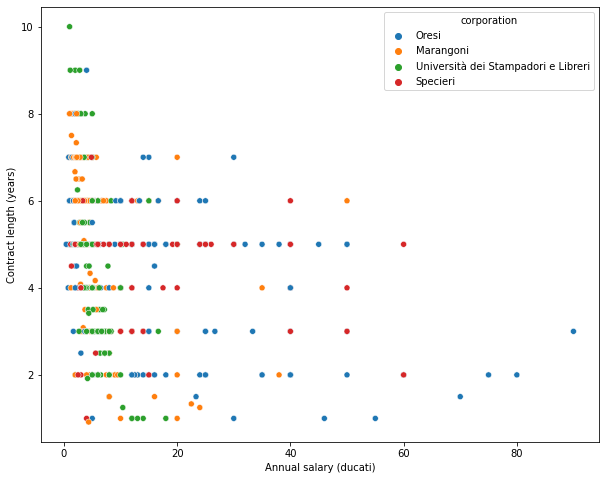

In [58]:
ax = sns.scatterplot(
    x='annual_salary',
    y='length',
    data=contracts_zoom_df,
    hue='corporation'
)

ax.set_xlabel('Annual salary (ducati)')
ax.set_ylabel('Contract length (years)')

fig = ax.get_figure()
fig.set_size_inches(10,8)

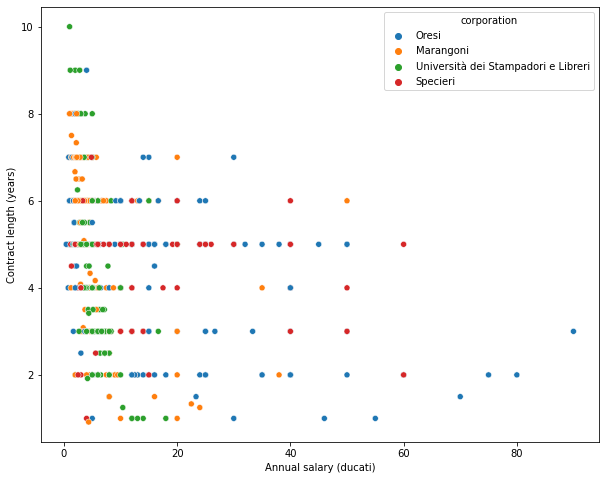

In [94]:
ax = sns.scatterplot(
    x='annual_salary',
    y='length',
    data=contracts_zoom_df,
    hue='corporation'
)

ax.set_xlabel('Annual salary (ducati)')
ax.set_ylabel('Contract length (years)')

fig = ax.get_figure()
fig.set_size_inches(10,8)

In [32]:
contracts_zoom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 9639
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   page_title                1945 non-null   object 
 1   register                  1945 non-null   object 
 2   annual_salary             1633 non-null   float64
 3   a_profession              1945 non-null   object 
 4   profession_code_strict    1945 non-null   object 
 5   profession_code_gen       1945 non-null   object 
 6   profession_cat            1945 non-null   object 
 7   corporation               1945 non-null   object 
 8   keep_profession_a         1945 non-null   int64  
 9   complete_profession_a     1945 non-null   int64  
 10  enrolmentY                1941 non-null   float64
 11  enrolmentM                1942 non-null   float64
 12  startY                    1924 non-null   float64
 13  startM                    1927 non-null   float64
 14  length  

### Plot: annual salary by corporation

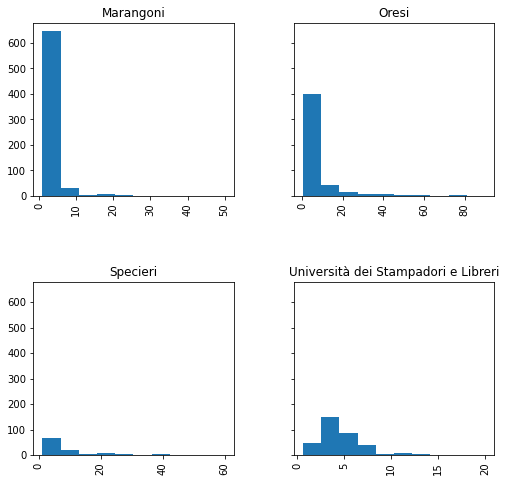

In [33]:
axes = contracts_zoom_df.hist(
    column='annual_salary',
    by='corporation',
    sharex=False,
    sharey=True,
    figsize=(8,8),
)

Combining hue and size of data points to add information to the scatter plot:

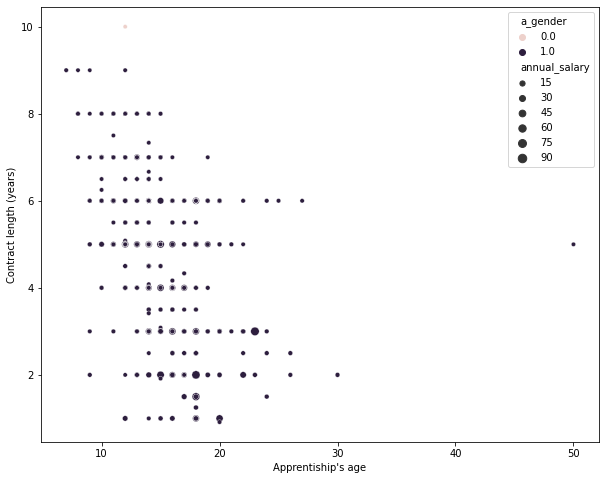

In [59]:
ax = sns.scatterplot(
    x='a_age',
    y='length',
    size='annual_salary',
    data=contracts_zoom_df,
    hue='a_gender'
)

ax.set_xlabel('Apprentiship\'s age')
ax.set_ylabel('Contract length (years)')

fig = ax.get_figure()
fig.set_size_inches(10,8)

In [60]:
fig.savefig('figures/plot2.png', dpi=300)

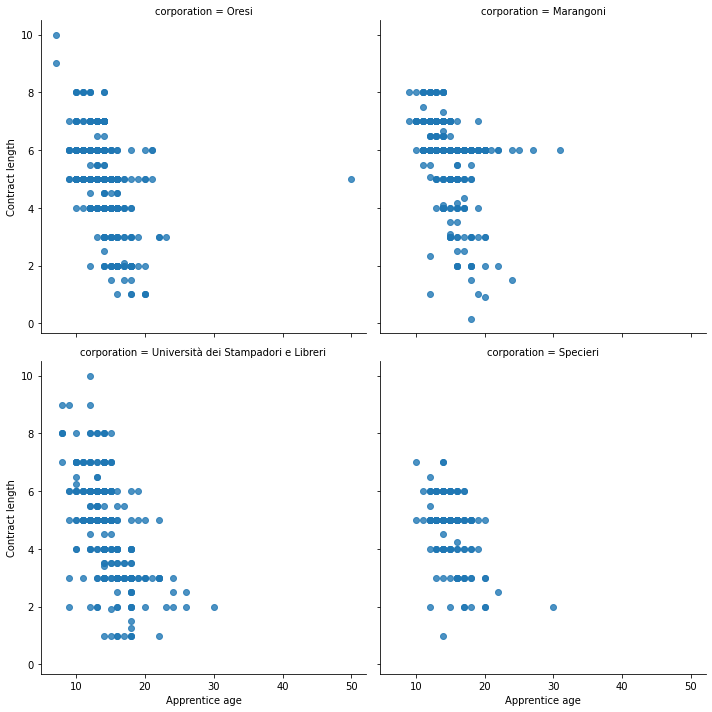

In [63]:
ax = sns.lmplot(
    x="a_age",
    y="length",
    data=contracts_zoom_df,
    fit_reg=False,
    col='corporation',
    col_wrap=2
)
ax.set_xlabels('Apprentice age')
ax.set_ylabels('Contract length')

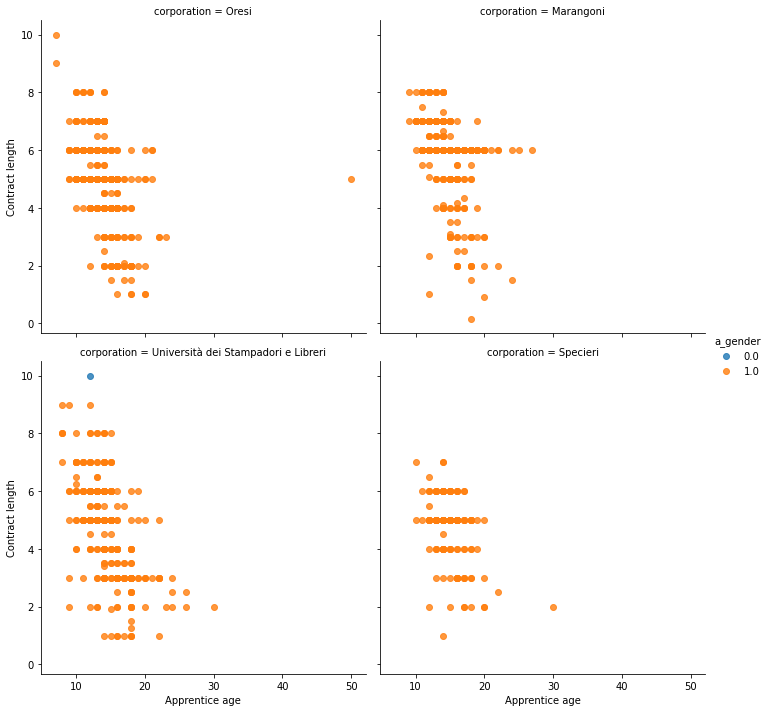

In [64]:
ax = sns.lmplot(
    x="a_age",
    y="length",
    data=contracts_zoom_df,
    fit_reg=False,
    col='corporation',
    hue='a_gender',
    col_wrap=2
)
ax.set_xlabels('Apprentice age')
ax.set_ylabels('Contract length')

## Controlling aestethics with seaborn

See this tutorial http://seaborn.pydata.org/tutorial/aesthetics.html

---